# What are the most demanded skills for the top 3 most popular data roles?

In [3]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Filtering Data for the United Kingdom

In [4]:
df_UK= df[df['job_country']== 'United Kingdom' ]


In [5]:
df_skills = df_UK.explode('job_skills')

df_skills[['job_title', 'job_skills']]

,job_title,job_skills
15,Data Engineer,python
15,Data Engineer,sql
15,Data Engineer,power bi
45,Senior Data Analyst,sql
45,Senior Data Analyst,python
...,...,...
785642,Submission for the position: Data Engineer Sen...,qlik
785642,Submission for the position: Data Engineer Sen...,confluence
785642,Submission for the position: Data Engineer Sen...,jira
785676,Senior Data Scientist,r


### Counting Skills per Job Title

In [6]:
df_skills_count = df_skills.groupby(['job_skills','job_title_short']).size()
df_skills_count = df_skills_count.reset_index(name='skill_count')

df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)
df_skills_count

,job_skills,job_title_short,skill_count
1163,sql,Data Engineer,7050
915,python,Data Engineer,6462
916,python,Data Scientist,6329
88,azure,Data Engineer,4865
1162,sql,Data Analyst,4467
...,...,...,...
786,openstack,Software Engineer,1
783,opencv,Software Engineer,1
780,opencv,Machine Learning Engineer,1
775,objective-c,Data Analyst,1


### Top 3 Roles :

Fetching top 3 roles:

In [7]:
job_titles = df_skills_count['job_title_short'].unique().tolist() 
job_titles= sorted(job_titles[:3])
job_titles 

['Data Analyst', 'Data Engineer', 'Data Scientist']

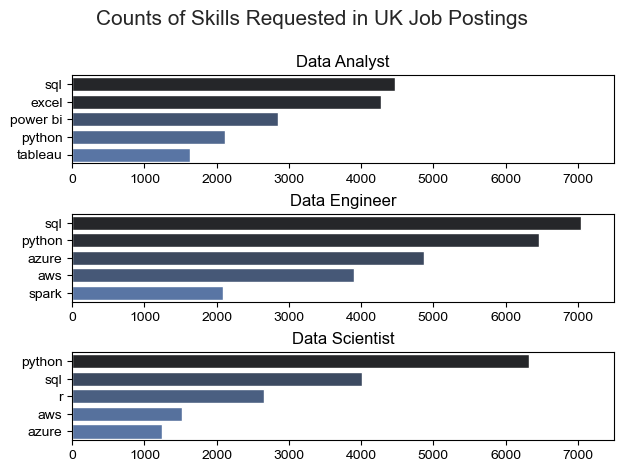

In [8]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)[::-1]
    sns.barplot(data=df_plot, x='skill_count', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 7500) # make the scales the same

fig.suptitle('Counts of Skills Requested in UK Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) # fix the overlap
plt.show()

### Converting Counts to Percentages

In [10]:
df_job_title_count = df_UK['job_title_short'].value_counts().reset_index(name='job_total')
df_job_title_count

,job_title_short,job_total
0,Data Engineer,11807
1,Data Analyst,10482
2,Data Scientist,9148
3,Senior Data Engineer,3337
4,Senior Data Scientist,2367
5,Senior Data Analyst,1356
6,Business Analyst,827
7,Software Engineer,541
8,Machine Learning Engineer,317
9,Cloud Engineer,193


In [15]:
df_skills_percentage = pd.merge(df_skills_count, df_job_title_count, on='job_title_short', how='left')

df_skills_percentage['skills_percent'] = (df_skills_percentage['skill_count']/df_skills_percentage['job_total'] * 100)
df_skills_percentage

,job_skills,job_title_short,skill_count,job_total,skills_percent
0,sql,Data Engineer,7050,11807,59.710341
1,python,Data Engineer,6462,11807,54.730245
2,python,Data Scientist,6329,9148,69.184521
3,azure,Data Engineer,4865,11807,41.204370
4,sql,Data Analyst,4467,10482,42.615913
...,...,...,...,...,...
1414,openstack,Software Engineer,1,541,0.184843
1415,opencv,Software Engineer,1,541,0.184843
1416,opencv,Machine Learning Engineer,1,317,0.315457
1417,objective-c,Data Analyst,1,10482,0.009540


### Plotting the percentage count :

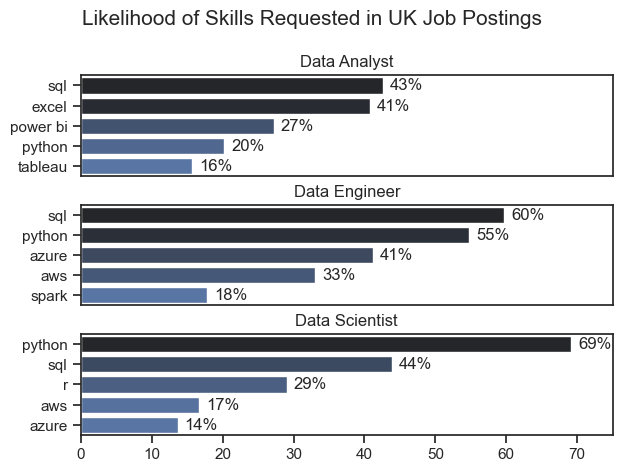

In [29]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_percentage[df_skills_percentage['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skills_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0,75) 

    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

    for n, v in enumerate(df_plot['skills_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')    

fig.suptitle('Likelihood of Skills Requested in UK Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) 
plt.show()